<a href="https://colab.research.google.com/github/jjhwan-h/ML/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.2.25 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


# RoboFlow에서 만든 dataset unzip

In [ ]:
!unzip HW-8.v4i.yolov8.zip -d /content

Archive:  HW-8.v4i.yolov8.zip
  inflating: /content/README.dataset.txt  
  inflating: /content/README.roboflow.txt  
  inflating: /content/data.yaml      
   creating: /content/test/
   creating: /content/test/images/
 extracting: /content/test/images/-110_png.rf.6082d8203728d1ac4f9c8d952497ca1a.jpg  
 extracting: /content/test/images/-112_png.rf.8e69121e98ee6da6c483f7f5aaf9fdfd.jpg  
 extracting: /content/test/images/-118_png.rf.1e5d170cbc5d442d077e144733000423.jpg  
 extracting: /content/test/images/-120_png.rf.200f55dd9dae19314342ce4ce65b3cfe.jpg  
 extracting: /content/test/images/-121_png.rf.b845eb0df7e5248f3bd965ed27819fe4.jpg  
 extracting: /content/test/images/-146_png.rf.863bc52a0485812b46e4f74e25634900.jpg  
 extracting: /content/test/images/-16_png.rf.593c96dc0a82494b1e37b6fe599b5e62.jpg  
 extracting: /content/test/images/-17_png.rf.6442a25922830f9e1d571bde7779b252.jpg  
 extracting: /content/test/images/-22_png.rf.3f14bd8a82f5038d7920ab7fc5fb8b32.jpg  
 extracting: /conten

# Training

In [ ]:
%cd /content
!yolo task=detect mode=train  data=data.yaml epochs=100 imgsz=640

/content
100% 6.23M/6.23M [00:00<00:00, 78.1MB/s]
Ultralytics YOLOv8.2.25 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

# Val

In [ ]:
%cd /content
!yolo detect val model=/content/runs/detect/train/weights/best.pt data=/content/data.yaml

/content
Ultralytics YOLOv8.2.25 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/valid/labels.cache... 74 images, 0 backgrounds, 0 corrupt: 100% 74/74 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:07<00:00,  1.46s/it]
                   all         74         91      0.673      0.794      0.796      0.459
                   cat         74         31      0.762      0.839      0.852      0.392
             hangyodon         74         30      0.684      0.651      0.694      0.481
             sea-otter         74         30      0.572      0.892      0.841      0.506
Speed: 4.8ms preprocess, 17.9ms inference, 0.0ms loss, 35.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# Detection

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

model = YOLO("/content/runs/detect/train/weights/best.pt")


image 1/1 /content/han.jpeg: 384x640 1 hangyodon, 18.8ms
Speed: 2.0ms preprocess, 18.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


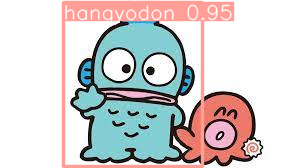

In [ ]:
results = model.predict("/content/han.jpeg")
res_plotted = results[0].plot()

cv2_imshow(res_plotted)


image 1/1 /content/cat2.jpeg: 448x640 1 cat, 62.0ms
Speed: 2.5ms preprocess, 62.0ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


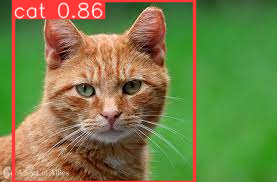

In [ ]:
results = model.predict("/content/cat2.jpeg")
res_plotted = results[0].plot()

cv2_imshow(res_plotted)


image 1/1 /content/sea-otter.jpeg: 448x640 1 sea-otter, 9.8ms
Speed: 2.7ms preprocess, 9.8ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)


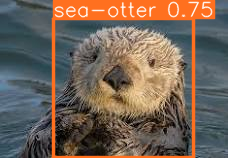

In [ ]:
results = model.predict("/content/sea-otter.jpeg")
res_plotted = results[0].plot()

cv2_imshow(res_plotted)

# Object Tracking

In [ ]:
from collections import defaultdict

import cv2
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the YOLOv8 model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Open the video file
video_path = "/content/IMG_1429.MOV"
cap = cv2.VideoCapture(video_path)

# Store the track history
track_history = defaultdict(lambda: [])
# Retrieve video properties: width, height, and frames per second
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

# Initialize video writer to save the output video with the specified properties
out = cv2.VideoWriter("result.mp4", cv2.VideoWriter_fourcc(*"MJPG"), fps, (w, h))

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
      try:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)

        # Get the boxes and track IDs
        boxes = results[0].boxes.xywh.cpu()
        track_ids = results[0].boxes.id.int().cpu().tolist()

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Plot the tracks
        for box, track_id in zip(boxes, track_ids):
            x, y, w, h = box
            track = track_history[track_id]
            track.append((float(x), float(y)))  # x, y center point
            if len(track) > 30:  # retain 90 tracks for 90 frames
                track.pop(0)

            # Draw the tracking lines
            points = np.hstack(track).astype(np.int32).reshape((-1, 1, 2))
            cv2.polylines(
                annotated_frame,
                [points],
                isClosed=False,
                color=(230, 230, 230),
                thickness=10,
            )
          # Display the annotated frame
        out.write(annotated_frame)
        cv2_imshow(annotated_frame)
      except Exception as e:
          print(f"An error occurred: {e}")

      # Break the loop if 'q' is pressed
      if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
out.release()
cap.release()
cv2.destroyAllWindows()